In [1]:
import os
import sys

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from astropy.io import fits

pwd = os.getcwd()

little_things_root_dir = os.path.dirname(os.path.dirname(pwd))
sys.path.append(little_things_root_dir)

data_dir = os.path.join(little_things_root_dir, 'data')

In [2]:
def params(name,pos,a,b,pa):
    galaxy_name = name
    x0, y0 = pos[0], pos[1]
    
    # Opens the data. 
    file = os.path.join(data_dir, f'{galaxy_name}_1mom.fits')
    data = fits.open(file)[0].data
    data_crop = fits.open(file)[0].data
    
    # Plots the final ring onto moment map. 
    ell = Ellipse((x0,y0), width = 2*a, height = 2*b, angle = pa + 90, 
                  fill = False, edgecolor = 'black', linewidth = 5)
    fig, ax = plt.subplots()
    ax.add_artist(ell)
    ax.imshow(data, origin = 'lower')
    ax.plot(x0,y0,marker = "x", ms = 15, mew = 5, color = 'black') # center point

**Input the parameters down below (position, a, and b are in units of pixels. Position angle is in degrees).**

* To get a in pixels, take Rmax in arcsecs, convert to degrees, then use DEG_PER_PIXEL = 4.17e-4.
* To get b, use the equation: $b = acos(i)$

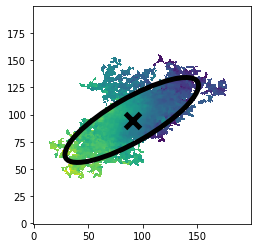

In [25]:
params('UGC8508', pos = (90,95), a = 70, b = 20, pa = 120)

**This cell can be ignored but kept if we need to crop moment maps w/ ellipses in the future.**

In [4]:
theta = np.radians(360 + 90)

for j in range(len(data_crop[0])):
    for i in range(len(data_crop[0])):
        if ((((i-x0)*np.cos(theta) + (j-y0)*np.sin(theta))/a)**2 + ((-(i-x0)*np.sin(theta) + (j-y0)*np.cos(theta))/b)**2 > 1):
            data_crop[j][i] = 'nan'
            
plt.imshow(data_crop, origin="lower", cmap = 'autumn')
plt.contour(data_crop, levels = np.arange(330,420,10), colors ='black')
plt.show()

NameError: name 'data_crop' is not defined